##### Exploring venues in Toronto, Canada and the correlation with Apartment Rental Price
### Iri

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json 
import sklearn
import geopandas as gpd
from shapely.geometry import Point,Polygon
import requests
import geopy
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import plotly_express as px
%matplotlib inline

In [2]:
df_rent=pd.read_csv('Toronto_apartment_rentals_2018.csv')
df_rent['Price'] = df_rent['Price'].str.replace(',', '').str.replace('$', '').astype(float)
df_rent.head()

Bedroom  Bathroom  Den                                            Address  \
0        2       2.0    0  3985 Grand Park Drive, 3985 Grand Park Dr, Mis...   
1        1       1.0    1        361 Front St W, Toronto, ON M5V 3R5, Canada   
2        1       1.0    0             89 McGill Street, Toronto, ON, M5B 0B1   
3        2       2.0    0               10 York Street, Toronto, ON, M5J 0E1   
4        1       1.0    0      80 St Patrick St, Toronto, ON M5T 2X6, Canada   

         Lat       Long   Price  
0  43.581639 -79.648193  2450.0  
1  43.643051 -79.391643  2150.0  
2  43.660605 -79.378635  1950.0  
3  43.641087 -79.381405  2900.0  
4  43.652487 -79.389622  1800.0

In [3]:
df_rent.describe()

Bedroom     Bathroom          Den          Lat         Long  \
count  1124.000000  1124.000000  1124.000000  1124.000000  1124.000000   
mean      1.370107     1.237544     0.153025    43.703532   -79.500326   
std       0.553493     0.431997     0.360172     0.692689     1.760654   
min       1.000000     1.000000     0.000000    42.985767  -114.082215   
25%       1.000000     1.000000     0.000000    43.641355   -79.414319   
50%       1.000000     1.000000     0.000000    43.650560   -79.387295   
75%       2.000000     1.000000     0.000000    43.666613   -79.377198   
max       3.000000     3.000000     1.000000    56.130366   -73.576385   

               Price  
count    1124.000000  
mean     3627.912811  
std     27530.542058  
min        65.000000  
25%      1759.250000  
50%      2100.000000  
75%      2500.000000  
max    535000.000000

In [4]:
#remove price outliner
df_rent=df_rent.drop(df_rent[df_rent['Price'] < 500].index, inplace = False) 
df_rent=df_rent.drop(df_rent[df_rent['Price'] > 5000].index, inplace = False) 
df_rent.describe()

Bedroom     Bathroom          Den          Lat         Long  \
count  1111.000000  1111.000000  1111.000000  1111.000000  1111.000000   
mean      1.368137     1.233573     0.153915    43.703980   -79.501612   
std       0.550538     0.426739     0.361030     0.696716     1.770890   
min       1.000000     1.000000     0.000000    42.985767  -114.082215   
25%       1.000000     1.000000     0.000000    43.641324   -79.414617   
50%       1.000000     1.000000     0.000000    43.650560   -79.387295   
75%       2.000000     1.000000     0.000000    43.666130   -79.376994   
max       3.000000     3.000000     1.000000    56.130366   -73.576385   

             Price  
count  1111.000000  
mean   2164.636364  
std     650.862003  
min     550.000000  
25%    1775.000000  
50%    2100.000000  
75%    2500.000000  
max    4900.000000

In [5]:
#remove location outliner 
df_rent=df_rent.drop(df_rent[df_rent['Lat'] < 43.60].index, inplace = False) 
df_rent=df_rent.drop(df_rent[df_rent['Lat'] > 43.80].index, inplace = False) 
df_rent=df_rent.drop(df_rent[df_rent['Long'] > -79.29].index, inplace = False) 
df_rent=df_rent.drop(df_rent[df_rent['Long'] > -79.19].index, inplace = False) 
df_rent.describe()

Bedroom    Bathroom         Den         Lat        Long        Price
count  907.000000  907.000000  907.000000  907.000000  907.000000   907.000000
mean     1.312018    1.219405    0.152150   43.656486  -79.404470  2236.392503
std      0.521819    0.420683    0.359364    0.025578    0.072829   661.511595
min      1.000000    1.000000    0.000000   43.607057  -80.041462   550.000000
25%      1.000000    1.000000    0.000000   43.641873  -79.399960  1850.000000
50%      1.000000    1.000000    0.000000   43.650324  -79.387295  2200.000000
75%      2.000000    1.000000    0.000000   43.661105  -79.378662  2550.000000
max      3.000000    3.000000    1.000000   43.795986  -79.294814  4900.000000

In [6]:
df_rent.head()

Bedroom  Bathroom  Den                                        Address  \
1        1       1.0    1    361 Front St W, Toronto, ON M5V 3R5, Canada   
2        1       1.0    0         89 McGill Street, Toronto, ON, M5B 0B1   
3        2       2.0    0           10 York Street, Toronto, ON, M5J 0E1   
4        1       1.0    0  80 St Patrick St, Toronto, ON M5T 2X6, Canada   
5        1       1.0    0        87 Jameson Avenue, Toronto, ON, M6K 2W8   

         Lat       Long   Price  
1  43.643051 -79.391643  2150.0  
2  43.660605 -79.378635  1950.0  
3  43.641087 -79.381405  2900.0  
4  43.652487 -79.389622  1800.0  
5  43.634890 -79.434654  1729.0

In [7]:
small_df_rent = df_rent.iloc[:-2:2]
small_df_rent.describe()

Bedroom    Bathroom         Den         Lat        Long       Price
count  453.000000  453.000000  453.000000  453.000000  453.000000   453.00000
mean     1.306843    1.228477    0.165563   43.657239  -79.406456  2216.87638
std      0.528709    0.432636    0.372099    0.026985    0.079199   690.15616
min      1.000000    1.000000    0.000000   43.607057  -80.041462   550.00000
25%      1.000000    1.000000    0.000000   43.641908  -79.400827  1830.00000
50%      1.000000    1.000000    0.000000   43.650560  -79.387295  2200.00000
75%      2.000000    1.000000    0.000000   43.660846  -79.378756  2550.00000
max      3.000000    3.000000    1.000000   43.795759  -79.294814  4900.00000

In [8]:
import folium
locations = small_df_rent[['Lat', 'Long']]
locationlist = locations.values.tolist()
len(locationlist)
map = folium.Map(location=[43.65, -79.37], zoom_start=13)
for point in range(0, len(locationlist)):
    folium.Marker(locationlist[point]).add_to(map)
map.save("house.jpg")
map

In [86]:
map.save('house.html')

Text(0.5, 1.0, 'Count of rental price in Downtown Toronto')

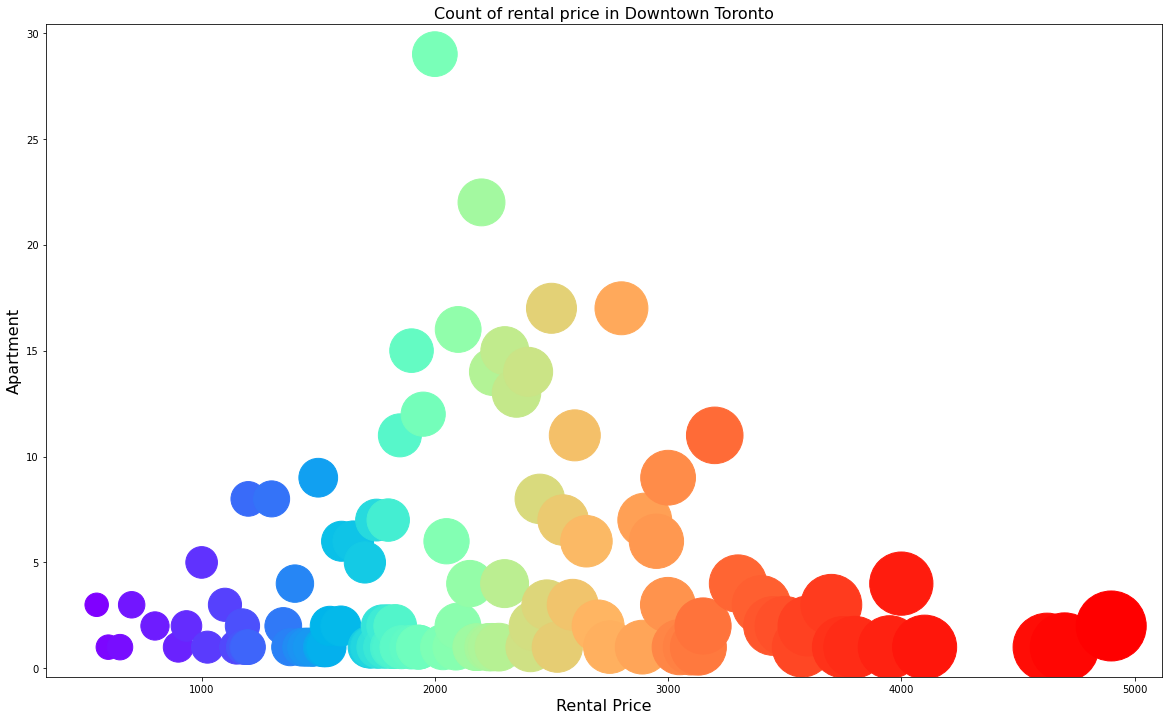

In [9]:
import matplotlib.cm as cm
import matplotlib.colors as colors
average_prices = small_df_rent['Price'].value_counts().sort_index()
plt.figure(figsize = (20, 12))
plt.scatter(average_prices.index, 
            average_prices.values, 
            s = average_prices.index, 
            c = cm.rainbow(np.linspace(0, 1, len(average_prices.index))))
plt.xlabel("Rental Price", fontsize = 16)
plt.ylabel("Apartment", fontsize = 16)
plt.title("Count of rental price in Downtown Toronto", fontsize = 16)


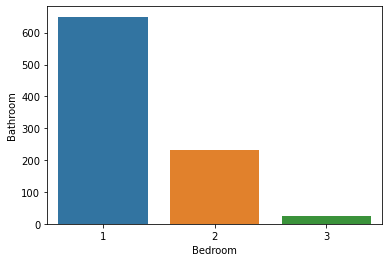

In [10]:
bedroom=df_rent.groupby('Bedroom').count()
sns.barplot(y=bedroom['Bathroom'],x=bedroom.index)

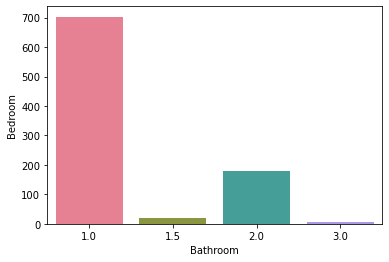

In [11]:
bathroom=df_rent.groupby('Bathroom').count()
sns.barplot(y=bathroom['Bedroom'],x=bathroom.index,palette="husl")


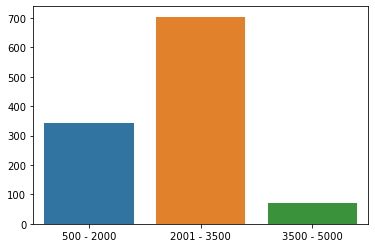

In [12]:
p2000=df_rent[df_rent.Price < 2000].sum()
p3500=df_rent[(df_rent.Price > 2000) & (df_rent.Price < 3500)].sum()
p5000=df_rent[df_rent.Price > 3500].sum()    
x=['500 - 2000','2001 - 3500', '3500 - 5000']
y=[p2000[0],p3500[0],p5000[0]]
sns.barplot(y=y,x=x)

In [13]:
locations = df_rent[['Lat', 'Long']]
locationlist = locations.values.tolist()
len(locationlist)

907

In [14]:
toronto_df_new=pd.read_csv('toronto_df.csv')
toronto_df_new.head()

PostalCode          Borough                    Neighborhood   Latitude  \
0        M4E     East Toronto                     The Beaches  43.676357   
1        M4K     East Toronto    The Danforth West, Riverdale  43.679557   
2        M4L     East Toronto  India Bazaar, The Beaches West  43.668999   
3        M4M     East Toronto                 Studio District  43.659526   
4        M4N  Central Toronto                   Lawrence Park  43.728020   

   Longitude  
0 -79.293031  
1 -79.352188  
2 -79.315572  
3 -79.340923  
4 -79.388790

In [15]:
CLIENT_ID = 'J5VA3ACHCM1QJA4IYW4ZS3WHN3BPO4WMQ50BOD5E0DDG5ZXF'
CLIENT_SECRET = 'ET4MAN5NDZ2PK11JMA1TFPHMOYUPVNCIGUXST0SWMLBMPITU'
VERSION = '20180604'

In [16]:
url = 'https://api.foursquare.com/v2/venues/categories?&client_id={}&client_secret={}&v={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION)

category_results = requests.get(url).json()

In [17]:
categories = len(category_results['response']['categories'])
categories

10

In [18]:
all_categories = {}

for i in range(categories):
    venues = category_results['response']['categories'][i]['name']
    all_categories[venues] = i

print(all_categories)

{'Arts & Entertainment': 0, 'College & University': 1, 'Event': 2, 'Food': 3, 'Nightlife Spot': 4, 'Outdoors & Recreation': 5, 'Professional & Other Places': 6, 'Residence': 7, 'Shop & Service': 8, 'Travel & Transport': 9}


In [19]:
tourist_category = []
business_category = []
req_categories = ['Arts & Entertainment', 'Nightlife Spot', 'Outdoors & Recreation']
req_categories2 = ['Food', 'Shop & Service', 'Travel & Transport']


for i in req_categories:
    key = all_categories.get(i)
    venues = category_results['response']['categories'][key]['name']
    tourist_category.append(venues)
    for j in range(len(category_results['response']['categories'][key]['categories'])):
        sub_venues = category_results['response']['categories'][key]['categories'][j]['name']
        tourist_category.append(sub_venues)

for i in req_categories2:
    key = all_categories.get(i)
    venues = category_results['response']['categories'][key]['name']
    business_category.append(venues)
    for j in range(len(category_results['response']['categories'][key]['categories'])):
        sub_venues = category_results['response']['categories'][key]['categories'][j]['name']
        business_category.append(sub_venues)
        


In [20]:
#Business function
LIMIT = 25

def getNearbyVenues_business(names, latitudes, longitudes, radius=50000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['District', 
                  'District Latitude', 
                  'District Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    nearby_venues = nearby_venues[nearby_venues['Venue Category'].isin(business_category)]
    
    return(nearby_venues)

In [21]:
# Business Category 
business_state_venues = getNearbyVenues_business(names=toronto_df_new['Borough'],
                                   latitudes=toronto_df_new['Latitude'],
                                   longitudes=toronto_df_new['Longitude']
                                  )

East Toronto
East Toronto
East Toronto
East Toronto
Central Toronto
Central Toronto
Central Toronto
Central Toronto
Central Toronto
Central Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Central Toronto
Central Toronto
Central Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
West Toronto
West Toronto
West Toronto
West Toronto
West Toronto
West Toronto
Downtown Toronto
East Toronto


In [22]:
print(business_state_venues.shape)
business_state_venues.head()

(427, 7)


District  District Latitude  District Longitude  \
3   East Toronto          43.676357          -79.293031   
4   East Toronto          43.676357          -79.293031   
7   East Toronto          43.676357          -79.293031   
12  East Toronto          43.676357          -79.293031   
17  East Toronto          43.676357          -79.293031   

                             Venue  Venue Latitude  Venue Longitude  \
3                  Buds Coffee Bar       43.669375       -79.303218   
4                        Lake Inez       43.672520       -79.320712   
7   Descendant Detroit Style Pizza       43.662802       -79.332380   
12                   Serano Bakery       43.683139       -79.346531   
17                Bobbette & Belle       43.662210       -79.334830   

      Venue Category  
3        Coffee Shop  
4   Asian Restaurant  
7        Pizza Place  
12            Bakery  
17            Bakery

In [23]:
LIMIT = 25

def getNearbyVenues_tourist(names, latitudes, longitudes, radius=50000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['District', 
                  'District Latitude', 
                  'District Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    nearby_venues = nearby_venues[nearby_venues['Venue Category'].isin(tourist_category)]
    
    return(nearby_venues)

In [24]:
# Business Category 
tourist_state_venues = getNearbyVenues_tourist(names=toronto_df_new['Borough'],
                                   latitudes=toronto_df_new['Latitude'],
                                   longitudes=toronto_df_new['Longitude']
                                  )

East Toronto
East Toronto
East Toronto
East Toronto
Central Toronto
Central Toronto
Central Toronto
Central Toronto
Central Toronto
Central Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Central Toronto
Central Toronto
Central Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
West Toronto
West Toronto
West Toronto
West Toronto
West Toronto
West Toronto
Downtown Toronto
East Toronto


In [25]:
print(tourist_state_venues.shape)
tourist_state_venues.head()

(315, 7)


District  District Latitude  District Longitude               Venue  \
1  East Toronto          43.676357          -79.293031         Kew Gardens   
2  East Toronto          43.676357          -79.293031      Woodbine Beach   
5  East Toronto          43.676357          -79.293031  Left Field Brewery   
6  East Toronto          43.676357          -79.293031    I'm On The Beach   
8  East Toronto          43.676357          -79.293031     Kew-Balmy Beach   

   Venue Latitude  Venue Longitude Venue Category  
1       43.669038       -79.298538           Park  
2       43.663112       -79.306374          Beach  
5       43.673705       -79.330310        Brewery  
6       43.670364       -79.284696          Beach  
8       43.667372       -79.295312          Beach

<BarContainer object of 48 artists>

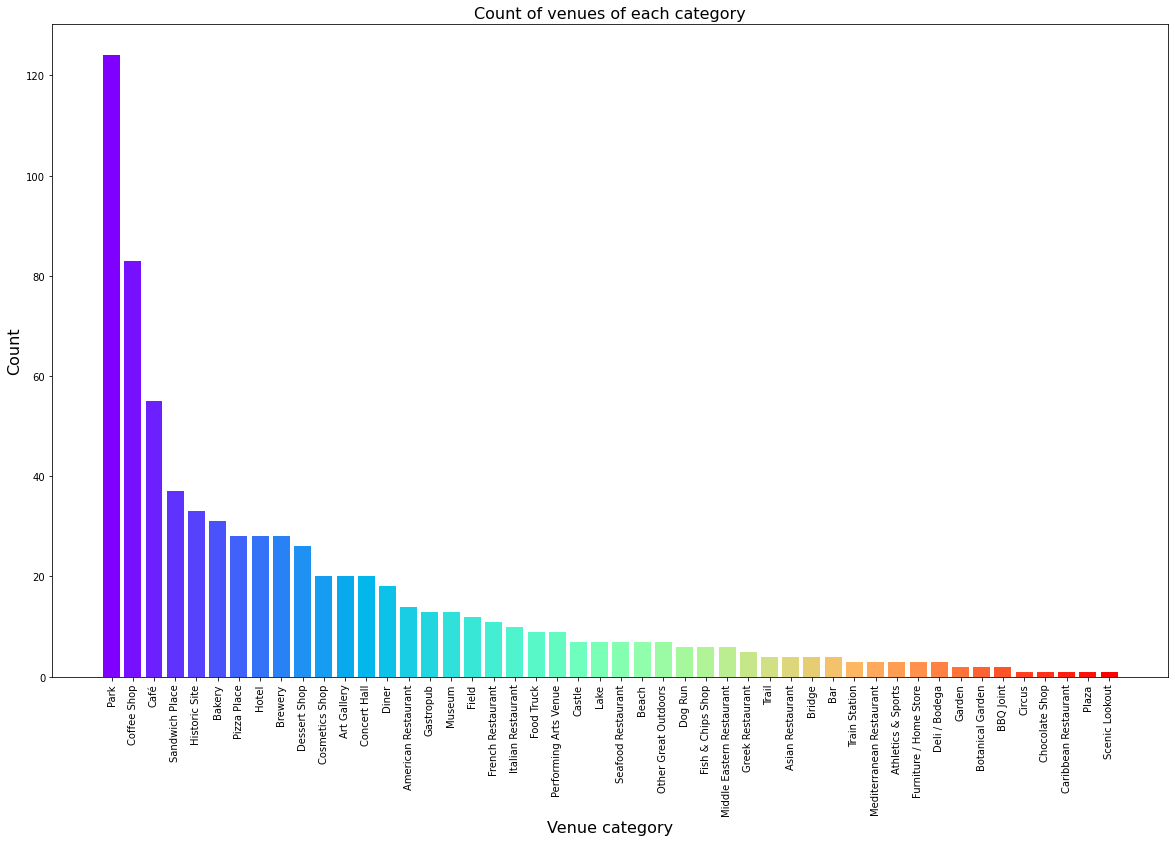

In [26]:
all_categories = tourist_state_venues.append(business_state_venues)
venue_distribution = all_categories['Venue Category'].value_counts()
colors = cm.rainbow(np.linspace(0, 1, len(venue_distribution.index)))
plt.figure(figsize = (20, 12))
plt.xticks(rotation = 90)
plt.xlabel("Venue category", fontsize = 16)
plt.ylabel("Count", fontsize = 16)
plt.title("Count of venues of each category", fontsize = 16)
plt.bar(venue_distribution.index, venue_distribution.values, color = colors)

In [27]:
all_categories['Venue Category'].value_counts()

Park                         124
Coffee Shop                   83
Café                          55
Sandwich Place                37
Historic Site                 33
Bakery                        31
Pizza Place                   28
Hotel                         28
Brewery                       28
Dessert Shop                  26
Cosmetics Shop                20
Art Gallery                   20
Concert Hall                  20
Diner                         18
American Restaurant           14
Gastropub                     13
Museum                        13
Field                         12
French Restaurant             11
Italian Restaurant            10
Food Truck                     9
Performing Arts Venue          9
Castle                         7
Lake                           7
Seafood Restaurant             7
Beach                          7
Other Great Outdoors           7
Dog Run                        6
Fish & Chips Shop              6
Middle Eastern Restaurant      6
Greek Rest

In [28]:
all_categories.describe()

District Latitude  District Longitude  Venue Latitude  Venue Longitude
count         742.000000          742.000000      742.000000       742.000000
mean           43.667175          -79.390123       43.661717       -79.390023
std             0.023320            0.039230        0.022129         0.036932
min            43.628947          -79.484450       43.622112       -79.513291
25%            43.648960          -79.405678       43.647938       -79.409521
50%            43.662301          -79.387383       43.654971       -79.389705
75%            43.679557          -79.375418       43.669177       -79.361534
max            43.728020          -79.293031       43.766961       -79.284696

In [57]:
import folium

map = folium.Map(location=[43.67, -79.29], zoom_start=12.5)
    
for rentlat, rentlon, rentpoi,rentroom in zip(df_rent['Lat'],
                        df_rent['Long'], 
                        df_rent['Price'], df_rent['Bedroom'] ):
    rentlabel = folium.Popup(str(rentpoi) + ', ' + str(rentroom) + ' Bedroom', parse_html=True)
    folium.CircleMarker(
            [rentlat, rentlon],
            radius=2,
            popup=rentlabel,
            color="crimson",
            fill=True,
            fill_color="crimson",
            fill_opacity=1).add_to(map)


for buslat, buslon, buspoi, busname in zip(business_state_venues['Venue Latitude'],
                        business_state_venues['Venue Longitude'], 
                        business_state_venues['Venue Category'], 
                        business_state_venues['Venue']):
    buslabel = folium.Popup(str(buspoi) + ', ' + str(busname), parse_html=True)
    folium.Marker([buslat, buslon],
            popup=buslabel).add_to(map)
    
for torlat, torlon, torpoi, torname in zip(tourist_state_venues['Venue Latitude'],
                        tourist_state_venues['Venue Longitude'], 
                        tourist_state_venues['Venue Category'],
                        tourist_state_venues['Venue']):
    torlabel = folium.Popup(str(torpoi) + ', ' + str(torname), parse_html=True)
    folium.Marker([torlat, torlon],
                 popup=torlabel,
                 icon=folium.Icon(color="green"),).add_to(map)
    
map

In [58]:
map.save('index.html')

In [31]:
import folium

map = folium.Map(location=[43.67, -79.29], zoom_start=12.5)
    

for buslat, buslon, buspoi, busname in zip(business_state_venues['Venue Latitude'],
                        business_state_venues['Venue Longitude'], 
                        business_state_venues['Venue Category'], 
                        business_state_venues['Venue']):
    buslabel = folium.Popup(str(buspoi) + ', ' + str(busname), parse_html=True)
    folium.Marker([buslat, buslon],
            popup=buslabel).add_to(map)
    
for torlat, torlon, torpoi, torname in zip(tourist_state_venues['Venue Latitude'],
                        tourist_state_venues['Venue Longitude'], 
                        tourist_state_venues['Venue Category'],
                        tourist_state_venues['Venue']):
    torlabel = folium.Popup(str(torpoi) + ', ' + str(torname), parse_html=True)
    folium.Marker([torlat, torlon],
                 popup=torlabel,
                 icon=folium.Icon(color="green"),).add_to(map)
    
map

In [32]:
map = folium.Map(location=[43.67, -79.29], zoom_start=12.5)
    

for buslat, buslon, buspoi, busname in zip(business_state_venues['Venue Latitude'],
                        business_state_venues['Venue Longitude'], 
                        business_state_venues['Venue Category'], 
                        business_state_venues['Venue']):
    buslabel = folium.Popup(str(buspoi) + ', ' + str(busname), parse_html=True)
    folium.Marker([buslat, buslon],
            popup=buslabel).add_to(map)
    
for torlat, torlon, torpoi, torname in zip(tourist_state_venues['Venue Latitude'],
                        tourist_state_venues['Venue Longitude'], 
                        tourist_state_venues['Venue Category'],
                        tourist_state_venues['Venue']):
    torlabel = folium.Popup(str(torpoi) + ', ' + str(torname), parse_html=True)
    folium.Marker([torlat, torlon],
                 popup=torlabel).add_to(map)
map.save('allwithout.html')   
map

In [47]:
map.save('all.html')

In [33]:
business_state_venues.head()

District  District Latitude  District Longitude  \
3   East Toronto          43.676357          -79.293031   
4   East Toronto          43.676357          -79.293031   
7   East Toronto          43.676357          -79.293031   
12  East Toronto          43.676357          -79.293031   
17  East Toronto          43.676357          -79.293031   

                             Venue  Venue Latitude  Venue Longitude  \
3                  Buds Coffee Bar       43.669375       -79.303218   
4                        Lake Inez       43.672520       -79.320712   
7   Descendant Detroit Style Pizza       43.662802       -79.332380   
12                   Serano Bakery       43.683139       -79.346531   
17                Bobbette & Belle       43.662210       -79.334830   

      Venue Category  
3        Coffee Shop  
4   Asian Restaurant  
7        Pizza Place  
12            Bakery  
17            Bakery

In [34]:
tourist_state_venues.head()

District  District Latitude  District Longitude               Venue  \
1  East Toronto          43.676357          -79.293031         Kew Gardens   
2  East Toronto          43.676357          -79.293031      Woodbine Beach   
5  East Toronto          43.676357          -79.293031  Left Field Brewery   
6  East Toronto          43.676357          -79.293031    I'm On The Beach   
8  East Toronto          43.676357          -79.293031     Kew-Balmy Beach   

   Venue Latitude  Venue Longitude Venue Category  
1       43.669038       -79.298538           Park  
2       43.663112       -79.306374          Beach  
5       43.673705       -79.330310        Brewery  
6       43.670364       -79.284696          Beach  
8       43.667372       -79.295312          Beach

In [35]:
small_df_rent.head()

Bedroom  Bathroom  Den                                            Address  \
1         1       1.0    1        361 Front St W, Toronto, ON M5V 3R5, Canada   
3         2       2.0    0               10 York Street, Toronto, ON, M5J 0E1   
5         1       1.0    0            87 Jameson Avenue, Toronto, ON, M6K 2W8   
8         1       1.0    0               560 Front St W, toronto, ON, M5V 0L5   
10        1       1.0    0  545 - 555  Sherbourne Street, Toronto, ON, M4X...   

          Lat       Long   Price  
1   43.643051 -79.391643  2150.0  
3   43.641087 -79.381405  2900.0  
5   43.634890 -79.434654  1729.0  
8   43.641308 -79.400093  1900.0  
10  43.668468 -79.374834  1750.0

In [36]:
def isInside(circle_x, circle_y, rad, x, y): 
      
    # Compare radius of circle 
    # with distance of its center 
    # from given point 
    if ((x - circle_x) * (x - circle_x) + 
        (y - circle_y) * (y - circle_y) <= rad * rad): 
        return True
    else: 
        return False

In [37]:
small_df_rent.index

Int64Index([   1,    3,    5,    8,   10,   12,   14,   16,   19,   21,
            ...
            1095, 1099, 1101, 1104, 1106, 1108, 1111, 1113, 1116, 1121],
           dtype='int64', length=453)

In [38]:
rad=0.01
rent_set=df_rent.copy()
touristlist=[]
businesslist=[]
for circle_x,circle_y in zip(rent_set['Lat'],rent_set['Long']):
    tourist=0
    business=0
    for x,y in zip(tourist_state_venues['Venue Latitude'],tourist_state_venues['Venue Longitude']):
        if isInside(circle_x, circle_y, rad, x, y) == True:
            tourist+=1
            
    touristlist.append(int(tourist))
    for x,y in zip(business_state_venues['Venue Latitude'],business_state_venues['Venue Longitude']):
        if isInside(circle_x, circle_y, rad, x, y) == True:
            business+=1
            
    businesslist.append(int(business))
    
rent_set['Business Venue'] = touristlist
rent_set['Tourist Venue'] = businesslist
rent_set.head()

Bedroom  Bathroom  Den                                        Address  \
1        1       1.0    1    361 Front St W, Toronto, ON M5V 3R5, Canada   
2        1       1.0    0         89 McGill Street, Toronto, ON, M5B 0B1   
3        2       2.0    0           10 York Street, Toronto, ON, M5J 0E1   
4        1       1.0    0  80 St Patrick St, Toronto, ON M5T 2X6, Canada   
5        1       1.0    0        87 Jameson Avenue, Toronto, ON, M6K 2W8   

         Lat       Long   Price  Business Venue  Tourist Venue  
1  43.643051 -79.391643  2150.0              11            123  
2  43.660605 -79.378635  1950.0               1             45  
3  43.641087 -79.381405  2900.0              28             20  
4  43.652487 -79.389622  1800.0              21            106  
5  43.634890 -79.434654  1729.0               0              0

In [39]:
rent_set.describe()

Bedroom    Bathroom         Den         Lat        Long  \
count  907.000000  907.000000  907.000000  907.000000  907.000000   
mean     1.312018    1.219405    0.152150   43.656486  -79.404470   
std      0.521819    0.420683    0.359364    0.025578    0.072829   
min      1.000000    1.000000    0.000000   43.607057  -80.041462   
25%      1.000000    1.000000    0.000000   43.641873  -79.399960   
50%      1.000000    1.000000    0.000000   43.650324  -79.387295   
75%      2.000000    1.000000    0.000000   43.661105  -79.378662   
max      3.000000    3.000000    1.000000   43.795986  -79.294814   

             Price  Business Venue  Tourist Venue  
count   907.000000      907.000000     907.000000  
mean   2236.392503       11.783903      48.391400  
std     661.511595       11.740180      43.021223  
min     550.000000        0.000000       0.000000  
25%    1850.000000        0.000000       9.000000  
50%    2200.000000        9.000000      41.000000  
75%    2550.000000       21.000000      79.000000  
max    4900.000000       40.000000     139.000000

In [41]:
corraltion = rent_set.corr()['Price'].sort_values()
pd.DataFrame(corraltion)

Price
Lat            -0.207454
Den             0.067796
Long            0.205895
Business Venue  0.211609
Tourist Venue   0.227609
Bedroom         0.493299
Bathroom        0.532627
Price           1.000000

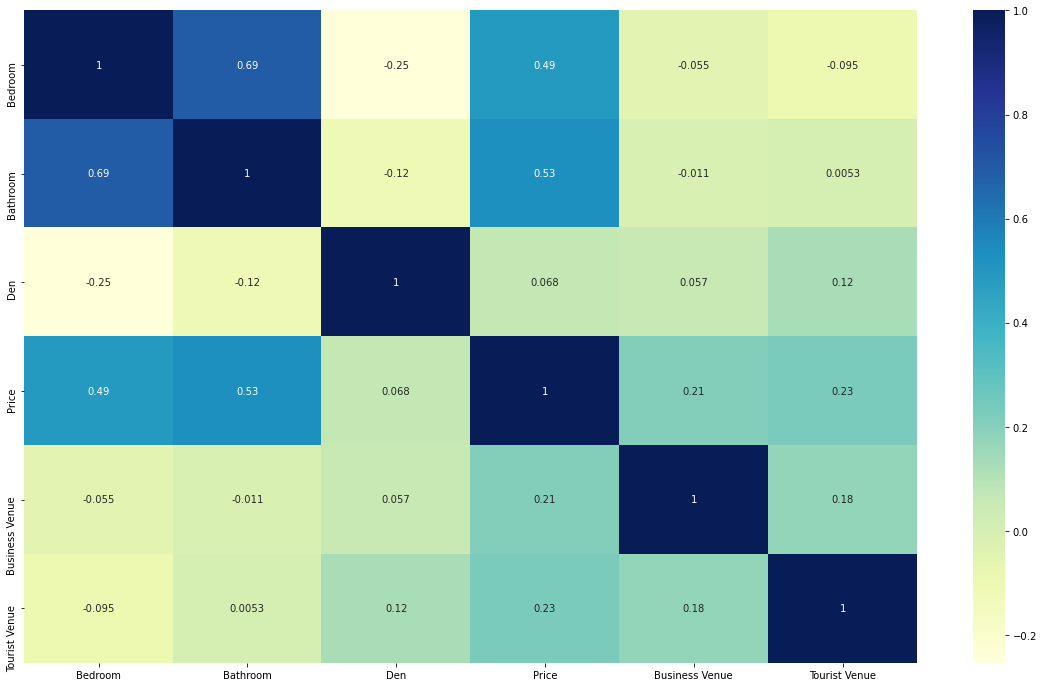

In [42]:
plt.figure(figsize = (20, 12))
corr_set=rent_set.copy().drop(['Lat','Long'],1)
sns.heatmap(corr_set.corr(), annot = True,cmap="YlGnBu")


In [43]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression

X=rent_set[['Bedroom','Bathroom','Business Venue','Tourist Venue']]
Y =rent_set['Price']
lm1 = LinearRegression()
lm1.fit(X,Y)
lm1.score(X, Y)

0.4122547617815142

In [44]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

In [45]:
pipe=Pipeline(Input)
pipe.fit(X,Y)
pipe.score(X,Y)

0.42565818299609104

In [46]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
print("done")

done


In [47]:

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)


print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 137
number of training samples: 770


In [48]:
from sklearn.linear_model import Ridge

In [49]:
clf = Ridge(alpha=0.1)
clf.fit(x_train, y_train)
clf.score(x_test,y_test)

0.4009624164722878

In [50]:
poly = PolynomialFeatures(degree=2)
x_train_ = poly.fit_transform(x_train)
x_test_ = poly.fit_transform(x_test)

clf2 = Ridge(alpha=0.1)
clf2.fit(x_train_ , y_train)
clf2.score(x_test_,y_test)

0.4057141857441925

In [51]:
from sklearn.cluster import KMeans

final=rent_set.copy()
NO_OF_CLUSTERS = 3

clustering = final.drop(['Address','Long','Lat'],1)
kMeans = KMeans(n_clusters = NO_OF_CLUSTERS, random_state = 0).fit(clustering)
final.insert(0, 'cluster_labels', kMeans.labels_)
final.head(5)

cluster_labels  Bedroom  Bathroom  Den  \
1               1        1       1.0    1   
2               1        1       1.0    0   
3               0        2       2.0    0   
4               2        1       1.0    0   
5               2        1       1.0    0   

                                         Address        Lat       Long  \
1    361 Front St W, Toronto, ON M5V 3R5, Canada  43.643051 -79.391643   
2         89 McGill Street, Toronto, ON, M5B 0B1  43.660605 -79.378635   
3           10 York Street, Toronto, ON, M5J 0E1  43.641087 -79.381405   
4  80 St Patrick St, Toronto, ON M5T 2X6, Canada  43.652487 -79.389622   
5        87 Jameson Avenue, Toronto, ON, M6K 2W8  43.634890 -79.434654   

    Price  Business Venue  Tourist Venue  
1  2150.0              11            123  
2  1950.0               1             45  
3  2900.0              28             20  
4  1800.0              21            106  
5  1729.0               0              0

In [56]:

import matplotlib.cm as cm
import matplotlib.colors as colors

toronto_map = folium.Map(location = [43.67, -79.29], zoom_start = 13)


# add venues to the map
x = np.arange(NO_OF_CLUSTERS)
ys = [i + x + (i*x)**2 for i in range(NO_OF_CLUSTERS)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
markers_colors = []

for venue, address, cluster, latitude, longitude in zip(final['Price'], 
                                                        final['Address'], 
                                                        final['cluster_labels'], 
                                                        final['Lat'], 
                                                        final['Long']):
    label = folium.Popup(str(venue) + ', ' + str(address), parse_html = True)
    folium.CircleMarker(
        [latitude, longitude],
        radius = 2,
        popup = label,
        color=rainbow[cluster-1],
        fill = True,
        fill_color=rainbow[cluster-1],
        fill_opacity = 1).add_to(toronto_map)

# add cluster centers to the map



toronto_map

In [59]:
toronto_map.save('cluster.html')

In [65]:
result1 = final[final['cluster_labels'] == 0]
print("Cluster 0")
result1d=result1.describe()
result1d

Cluster 0


cluster_labels     Bedroom    Bathroom         Den         Lat  \
count           177.0  177.000000  177.000000  177.000000  177.000000   
mean              0.0    1.909605    1.748588    0.062147   43.650359   
std               0.0    0.514305    0.465040    0.242107    0.013380   
min               0.0    1.000000    1.000000    0.000000   43.623289   
25%               0.0    2.000000    1.000000    0.000000   43.641806   
50%               0.0    2.000000    2.000000    0.000000   43.647513   
75%               0.0    2.000000    2.000000    0.000000   43.655988   
max               0.0    3.000000    3.000000    1.000000   43.761461   

             Long        Price  Business Venue  Tourist Venue  
count  177.000000   177.000000      177.000000     177.000000  
mean   -79.385902  3229.169492       14.564972      55.152542  
std      0.017465   451.635254       11.855547      39.794563  
min    -79.483695  2750.000000        0.000000       0.000000  
25%    -79.391341  2900.000000        1.000000      20.000000  
50%    -79.382072  3100.000000       19.000000      45.000000  
75%    -79.378145  3400.000000       24.000000      80.000000  
max    -79.353912  4900.000000       39.000000     139.000000

In [66]:
result2 = final[final['cluster_labels'] == 1]
print("Cluster 1")
result2d=result2.describe()
result2d

Cluster 1


cluster_labels     Bedroom    Bathroom         Den         Lat  \
count           510.0  510.000000  510.000000  510.000000  510.000000   
mean              1.0    1.180392    1.109804    0.229412   43.654234   
std               0.0    0.428375    0.311379    0.420867    0.025626   
min               1.0    1.000000    1.000000    0.000000   43.609261   
25%               1.0    1.000000    1.000000    0.000000   43.641662   
50%               1.0    1.000000    1.000000    0.000000   43.647870   
75%               1.0    1.000000    1.000000    0.000000   43.659788   
max               1.0    3.000000    3.000000    1.000000   43.795759   

             Long        Price  Business Venue  Tourist Venue  
count  510.000000   510.000000      510.000000     510.000000  
mean   -79.398373  2231.072549       12.490196      55.170588  
std      0.046241   233.627827       11.642468      43.985668  
min    -79.775558  1849.000000        0.000000       0.000000  
25%    -79.397839  2000.000000        1.000000      18.000000  
50%    -79.387308  2200.000000       11.000000      45.000000  
75%    -79.378795  2400.000000       21.000000     102.000000  
max    -79.319621  2707.000000       40.000000     139.000000

In [67]:
result3 = final[final['cluster_labels'] == 2]
print("Cluster 2")
result3d=result3.describe()
result3d

Cluster 2


cluster_labels     Bedroom    Bathroom         Den         Lat  \
count           220.0  220.000000  220.000000  220.000000  220.000000   
mean              2.0    1.136364    1.047727    0.045455   43.666635   
std               0.0    0.356986    0.221544    0.208774    0.029847   
min               2.0    1.000000    1.000000    0.000000   43.607057   
25%               2.0    1.000000    1.000000    0.000000   43.650258   
50%               2.0    1.000000    1.000000    0.000000   43.659679   
75%               2.0    1.000000    1.000000    0.000000   43.670747   
max               2.0    3.000000    3.000000    1.000000   43.795986   

             Long        Price  Business Venue  Tourist Venue  
count  220.000000   220.000000      220.000000     220.000000  
mean   -79.433541  1449.990909        7.909091      27.236364  
std      0.124554   318.823021       10.941560      35.970797  
min    -80.041462   550.000000        0.000000       0.000000  
25%    -79.433007  1237.500000        0.000000       0.000000  
50%    -79.391807  1514.500000        0.000000       9.000000  
75%    -79.378981  1719.000000       20.000000      43.250000  
max    -79.294814  1830.000000       40.000000     123.000000